In [4]:
from fastai import *
from fastai.text import *

In [5]:
path = Path('/home/nbuser/courses/fast-ai/course-v3/nbs/data/amazon')
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/amazon/Amazon_Unlocked_Mobile.csv'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/amazon/tmp_class'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/amazon/models'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/amazon/amazon_data_lm')]

In [6]:
df = pd.read_csv(path / 'Amazon_Unlocked_Mobile.csv')
df["response"] = np.where(df["Rating"] > 3, "positive", (np.where(df['Rating'] < 3, "negative", "neutral")))
df.Reviews = df.Reviews.apply(str)
print(len(df))
df.head(5)

413840


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,response
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive


In [7]:
data_lm = (TextList.from_df(df, path, cols=4)
           .random_split_by_pct(0.1)
           .label_for_lm()
           .databunch()
)

data_lm.save("amazon_data_lm")

In [8]:
data_lm = TextLMDataBunch.load(path, "amazon_data_lm")

In [9]:
len(data_lm.vocab.itos)

40321

In [9]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [10]:
learn

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (372456 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (372456 items)
[Text xxbos i feel so xxup lucky to have found this used ( phone to us & not used hard at all ) , phone on line from someone who upgraded and sold this one . xxmaj my xxmaj son liked his old one that finally fell apart after 2.5 + years and did n't want an upgrade ! ! xxmaj thank you xxmaj seller , we really appreciate it & your honesty re : said used phone . i recommend this seller very highly & would but from them again ! !, Text xxbos nice phone , nice up grade from my pantach revue . xxmaj very clean set up and easy set up . never had an android phone but they are fantastic to say the least . perfect size for surfing and social media . great phone samsung, Text xxbos xxmaj very pleased, Text xxbos xxmaj it works good but it goes slow sometimes but its a very good phone i love it, Text xxbos xxmaj great 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


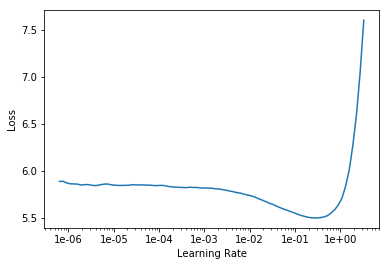

In [59]:
learn.lr_find()
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

Total time: 42:08
epoch  train_loss  valid_loss  accuracy
1      3.947014    3.806630    0.281007  (42:08)



In [61]:
learn.save('fit_head')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


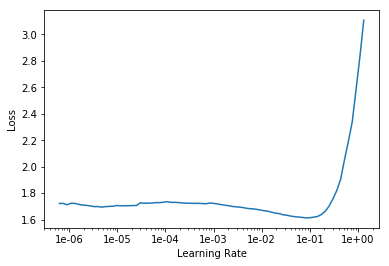

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

Total time: 2:00:39
epoch  train_loss  valid_loss  accuracy
1      0.852075    0.630288    0.818745  (12:01)
2      0.551518    0.440334    0.862957  (12:07)
3      0.453863    0.390414    0.873059  (12:01)
4      0.417040    0.372778    0.876092  (12:03)
5      0.401617    0.363218    0.877733  (12:06)
6      0.388894    0.358166    0.878956  (12:01)
7      0.383976    0.354630    0.879775  (12:02)
8      0.377142    0.352472    0.880237  (12:03)
9      0.372201    0.351194    0.880494  (12:03)
10     0.370774    0.351288    0.880475  (12:06)



In [21]:
learn.save("unfreeze_lm")

In [22]:
learn.save_encoder("unfreeze_lm_encoder")

In [62]:
learn.save_encoder("tmp_lm_encoder")

In [11]:
data_class = (TextList.from_df(df, path, cols=4)
              .random_split_by_pct(0.2)
              .label_from_df(6)
              .databunch(bs=50)
)

data_class.save("tmp_class")

In [12]:
data_class = TextClasDataBunch.load(path, "tmp_class", bs=50)

In [13]:
len(data_class.vocab.itos)

37535

In [14]:
learn_class = text_classifier_learner(data_class, drop_mult=0.5)
learn_class

RNNLearner(data=TextClasDataBunch;
Train: LabelList
y: CategoryList (331072 items)
[Category positive, Category positive, Category positive, Category positive, Category positive]...
Path: .
x: TextList (331072 items)
[Text xxbos i feel so xxup lucky to have found this used ( phone to us & not used hard at all ) , phone on line from someone who upgraded and sold this one . xxmaj my xxmaj son liked his old one that finally fell apart after 2.5 + years and did n't want an upgrade ! ! xxmaj thank you xxmaj seller , we really appreciate it & your honesty re : said used phone . i recommend this seller very highly & would but from them again ! !, Text xxbos nice phone , nice up grade from my xxunk xxunk . xxmaj very clean set up and easy set up . never had an android phone but they are fantastic to say the least . perfect size for surfing and social media . great phone samsung, Text xxbos xxmaj very pleased, Text xxbos xxmaj it works good but it goes slow sometimes but its a very good phone i

In [15]:
learn

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (372456 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (372456 items)
[Text xxbos i feel so xxup lucky to have found this used ( phone to us & not used hard at all ) , phone on line from someone who upgraded and sold this one . xxmaj my xxmaj son liked his old one that finally fell apart after 2.5 + years and did n't want an upgrade ! ! xxmaj thank you xxmaj seller , we really appreciate it & your honesty re : said used phone . i recommend this seller very highly & would but from them again ! !, Text xxbos nice phone , nice up grade from my pantach revue . xxmaj very clean set up and easy set up . never had an android phone but they are fantastic to say the least . perfect size for surfing and social media . great phone samsung, Text xxbos xxmaj very pleased, Text xxbos xxmaj it works good but it goes slow sometimes but its a very good phone i love it, Text xxbos xxmaj great 

In [72]:
# data_class.show_batch()

In [78]:
learn_class = text_classifier_learner(data_class, drop_mult=0.5)
learn_class.load_encoder("tmp_lm_encoder")

RuntimeError: Error(s) in loading state_dict for MultiBatchRNNCore:
	size mismatch for encoder.weight: copying a param of torch.Size([47023, 400]) from checkpoint, where the shape is torch.Size([43627, 400]) in current model.
	size mismatch for encoder_dp.emb.weight: copying a param of torch.Size([47023, 400]) from checkpoint, where the shape is torch.Size([43627, 400]) in current model.

In [ ]:
# learn_class.load_encoder("unfreeze_lm_encoder")
learn_class.freeze()
learn_class.lr_find()
learn_class.recorder.plot()